In [1]:
import pandas as pd

In [25]:
df1=pd.read_excel("Inventory Dataset.xlsx")

In [3]:
df2=pd.read_excel("New Inventory.xlsx")

In [26]:
df1

,Item Number,Date,Inventory
0,064-01-1347,2023-06-17,3561
1,064-01-1361,2023-06-17,4035
2,064-01-1375,2023-06-17,2684
3,064-01-1385,2023-06-17,5136
4,064-01-1399,2023-06-17,6399
...,...,...,...
351,064-18-9909,2023-06-17,12
352,064-18-9962,2023-06-17,19
353,064-18-0790,2023-06-17,5
354,064-18-3316,2023-06-17,7354


In [19]:
df2

,Item Number,Inventory Receive,Total Item Qty
0,064-13-0002,2023-07-07,700
1,064-13-0338,2023-07-07,1700
2,064-13-0340,2023-07-07,1000
3,064-13-0353,2023-07-07,1900
4,064-13-0416,2023-07-07,1000
...,...,...,...
1034,064-09-3787,2023-07-07,2088
1035,064-09-5287,2023-07-07,1388
1036,064-09-7924,2023-07-07,1632
1037,064-09-9076,2023-07-07,1708


#### since Date and Inventory date are same as Inventory received we will rename date to inventory received in order to avoid having two columns while merger

In [ ]:
df1.rename(columns = {'Date':'Inventory Receive'}, inplace = True)
df1.rename(columns = {'Inventory':'Total Item Qty'}, inplace = True)

In [ ]:
df1

# Merging the datasets into a single dataset/dataframe

In [42]:
big_df = pd.concat([df1, df2])
#saving the big_data file to CSV format
big_df.to_csv("big_data.csv")

In [36]:

big_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1395 entries, 0 to 1038
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Item Number        1395 non-null   object        
 1   Inventory Receive  1395 non-null   datetime64[ns]
 2   Total Item Qty     1395 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 43.6+ KB


In [145]:
item=big_df['Item Number'].unique()
item

array(['064-01-1347', '064-01-1361', '064-01-1375', '064-01-1385',
       '064-01-1399', '064-01-1409', '064-01-1423', '064-01-1430',
       '064-01-1437', '064-01-1444', '064-01-1348', '064-01-1362',
       '064-01-1376', '064-01-1386', '064-01-1400', '064-01-1410',
       '064-01-1424', '064-01-1431', '064-01-1438', '064-01-1445',
       '064-01-1349', '064-01-1363', '064-01-1388', '064-01-1401',
       '064-01-1411', '064-01-1446', '064-01-1346', '064-01-1360',
       '064-01-1384', '064-01-1398', '064-01-1408', '064-01-1443',
       '064-01-0006', '064-01-1449', '064-01-1450', '064-01-1451',
       '064-01-1452', '064-01-1926', '064-01-2259', '064-01-8348',
       '064-01-1350', '064-01-1402', '064-01-1412', '064-01-1447',
       '064-01-1351', '064-01-1365', '064-01-1389', '064-01-1403',
       '064-01-1413', '064-01-1448', '064-02-1500', '064-02-1511',
       '064-09-0557', '064-09-0566', '064-09-0014', '064-09-0041',
       '064-09-0059', '064-09-0131', '064-09-0675', '064-09-15

In [64]:
big_df.sort_values(by=['Item Number'])

,Item Number,Inventory Receive,Total Item Qty
467,064-01-0003,2023-09-29,5488
144,064-01-0003,2023-10-13,1864
475,064-01-0005,2023-09-29,7380
152,064-01-0005,2023-10-13,2520
32,064-01-0006,2023-06-17,10
...,...,...,...
515,064-18-9938,2023-07-09,2764
634,064-18-9938,2023-09-08,2084
280,064-18-9938,2023-09-29,1976
938,064-18-9938,2023-07-28,3196


#### Creating the required table/dataframe

In [236]:
df=big_df.pivot_table(index=pd.Grouper(freq='W',key='Inventory Receive'),columns="Item Number",values="Total Item Qty")
df=df.fillna(0)

# the line below was for experimental purpose
df["064-01-0003"]=df["064-01-0003"].cumsum()

In [204]:
df.head()

Item Number,064-01-0003,064-01-0005,064-01-0006,064-01-0012,064-01-0013,064-01-0016,064-01-0017,064-01-0018,064-01-0019,064-01-0035,...,064-18-9667,064-18-9699,064-18-9715,064-18-9724,064-18-9878,064-18-9884,064-18-9904,064-18-9909,064-18-9938,064-18-9962
Inventory Receive,,,,,,,,,,,,,,,,,,,,,
2023-06-18,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7029.0,5.0,9.0,7339.0,2.0,12419.0,0.0,12.0,2736.0,19.0
2023-07-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2930.0,0.0,0.0,0.0,0.0,2764.0,0.0
2023-07-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-07-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-07-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2420.0,0.0,0.0,0.0,0.0,3196.0,0.0


## This Step is for adding cumulative frequency (i.e if we had 10 objects in the inventory and none was added in next month still we would have 10 objects).

In [205]:
for i in item:
    df[[i]]=df[[i]].cumsum()
    

In [206]:
df.head()

Item Number,064-01-0003,064-01-0005,064-01-0006,064-01-0012,064-01-0013,064-01-0016,064-01-0017,064-01-0018,064-01-0019,064-01-0035,...,064-18-9667,064-18-9699,064-18-9715,064-18-9724,064-18-9878,064-18-9884,064-18-9904,064-18-9909,064-18-9938,064-18-9962
Inventory Receive,,,,,,,,,,,,,,,,,,,,,
2023-06-18,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7029.0,5.0,9.0,7339.0,2.0,12419.0,0.0,12.0,2736.0,19.0
2023-07-09,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7029.0,5.0,9.0,10269.0,2.0,12419.0,0.0,12.0,5500.0,19.0
2023-07-16,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7029.0,5.0,9.0,10269.0,2.0,12419.0,0.0,12.0,5500.0,19.0
2023-07-23,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7029.0,5.0,9.0,11869.0,2.0,12419.0,0.0,12.0,5500.0,19.0
2023-07-30,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7029.0,5.0,9.0,14289.0,2.0,12419.0,0.0,12.0,8696.0,19.0



## lets just get the column to rows and rows to columns for obtaining the required view


In [237]:
df=df.transpose()
df.to_csv("tr.csv")
df=pd.read_csv("tr.csv")
df.head()


,Item Number,2023-06-18,2023-07-09,2023-07-16,2023-07-23,2023-07-30,2023-08-06,2023-08-20,2023-08-27,2023-09-10,2023-09-17,2023-09-24,2023-10-01,2023-10-08,2023-10-15,2023-10-22,2023-11-26,2023-12-03,2023-12-10,2023-12-17
0,064-01-0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5488.0,5488.0,7352.0,7352.0,7352.0,7352.0,7352.0,7352.0
1,064-01-0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7380.0,0.0,2520.0,0.0,0.0,0.0,0.0,0.0
2,064-01-0006,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,064-01-0012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6840.0,0.0,3244.0,0.0,0.0,0.0,0.0,0.0
4,064-01-0013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6300.0,0.0,1748.0,0.0,0.0,0.0,0.0,0.0


In [238]:
df1=big_df.pivot_table(index=pd.Grouper(freq='M',key='Inventory Receive'),columns="Item Number",values="Total Item Qty")
df1=df1.fillna(0)

for i in item:
    df1[[i]]=df1[[i]].cumsum()
df1=df1.transpose()
df1.head()

Inventory Receive,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
Item Number,,,,,,,
064-01-0003,0.0,0.0,0.0,5488.0,7352.0,7352.0,7352.0
064-01-0005,0.0,0.0,0.0,7380.0,9900.0,9900.0,9900.0
064-01-0006,10.0,10.0,10.0,10.0,10.0,10.0,10.0
064-01-0012,0.0,0.0,0.0,6840.0,10084.0,10084.0,10084.0
064-01-0013,0.0,0.0,0.0,6300.0,8048.0,8048.0,8048.0


In [239]:
df1.to_csv("dd.csv")

In [240]:
df1=pd.read_csv("dd.csv")
df1.head()

,Item Number,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,064-01-0003,0.0,0.0,0.0,5488.0,7352.0,7352.0,7352.0
1,064-01-0005,0.0,0.0,0.0,7380.0,9900.0,9900.0,9900.0
2,064-01-0006,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,064-01-0012,0.0,0.0,0.0,6840.0,10084.0,10084.0,10084.0
4,064-01-0013,0.0,0.0,0.0,6300.0,8048.0,8048.0,8048.0


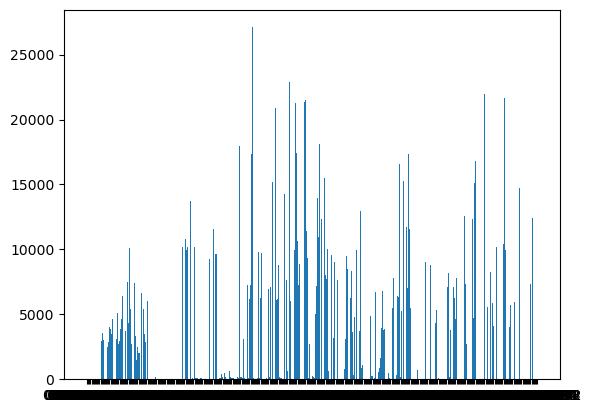

In [221]:
import matplotlib.pyplot as plt
#fig 1
x =df1["Item Number"]
y=df1["2023-06-30"]

plt.bar(x,y)
plt.show()

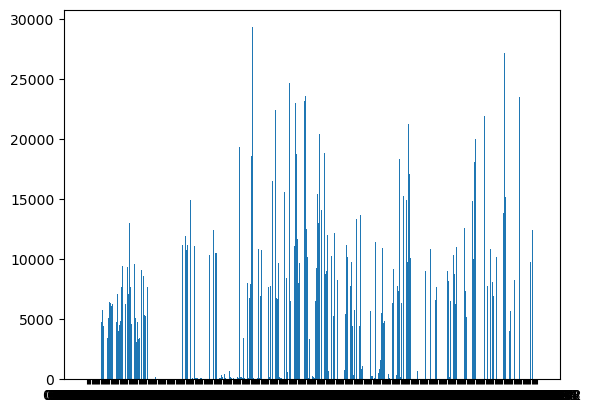

In [228]:
#fig2
x =df1["Item Number"]
y=df1["2023-07-31"]

plt.bar(x,y)
plt.show()

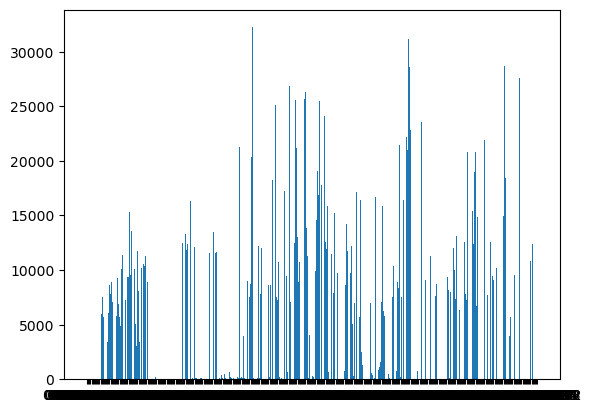

In [229]:
#fig3
x =df1["Item Number"]
y=df1["2023-08-31"]

plt.bar(x,y)
plt.show()

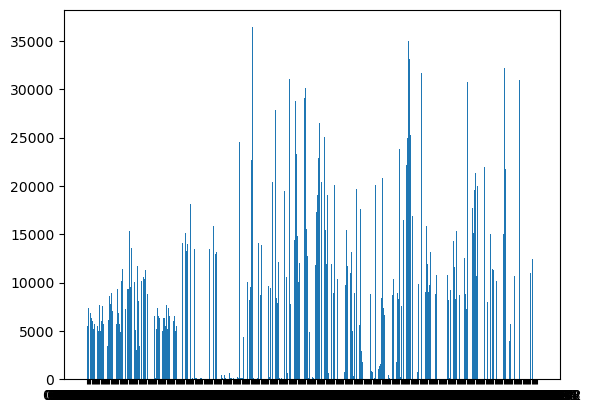

In [230]:
#fig4
x =df1["Item Number"]
y=df1["2023-09-30"]

plt.bar(x,y)
plt.show()

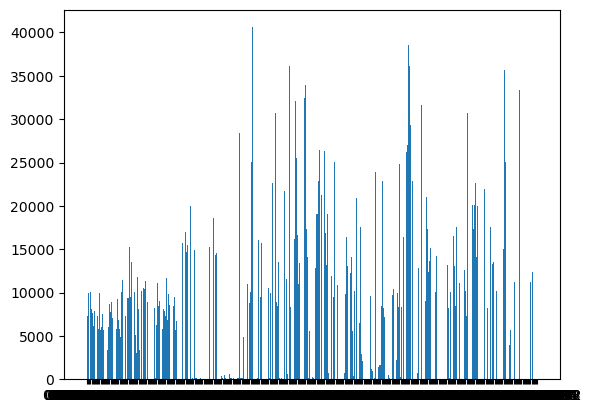

In [231]:
#fig5
x =df1["Item Number"]
y=df1["2023-10-31"]

plt.bar(x,y)
plt.show()

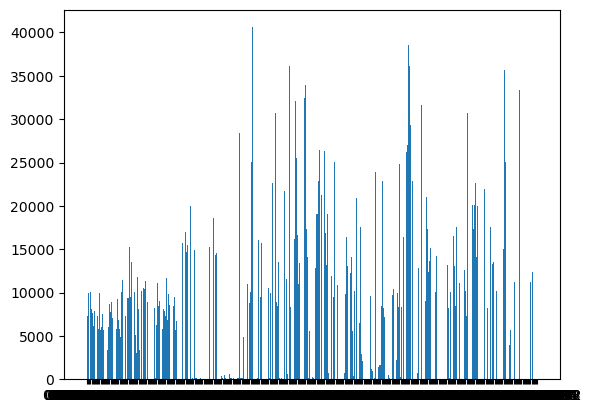

In [232]:
#fig6
x =df1["Item Number"]
y=df1["2023-11-30"]

plt.bar(x,y)
plt.show()

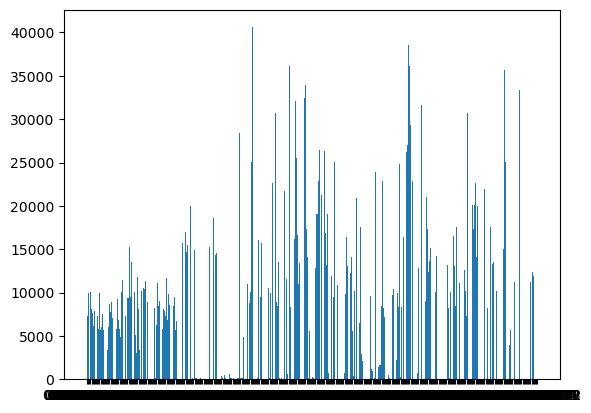

In [233]:
#fig7
x =df1["Item Number"]
y=df1["2023-12-31"]

plt.bar(x,y)
plt.show()

## If you look at each figures with detail you will notice the change in range .
## The range in the y - axis increases as the sales inventory increases with over time
### Also the lines appear darker than the above fig